<a href="https://colab.research.google.com/github/bryanMontoya/machineLearning/blob/main/Resumen_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA

plt.rc('font', size = 16)

In [ ]:
col_names = ['pregnant', 'glucose', 'bp','skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
path = 'drive/MyDrive/diabetes.csv'
pima = pd.read_csv(path)
pima = pima.set_axis(col_names, axis = 1)
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
X = pima.drop('label', axis = 1)
y = pima.label
print(X.shape)

(768, 8)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)                                                  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Modelos**

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors = 7)
LR_model = LogisticRegression()
DT_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1, max_depth = 5)
RF_model = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'sqrt', random_state = 1)
XGB_model = XGBClassifier(n_estimators = 100, max_depth=3,objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1, seed = 27 )
SVM_model = SVC(kernel = 'rbf', probability = True, C = 10, gamma = 0.01)
models = [KNN_model, LR_model, DT_model, RF_model, XGB_model, SVM_model]
colnames = ['KNN', 'LR', 'DT', 'RF', 'XGB', 'SVM']

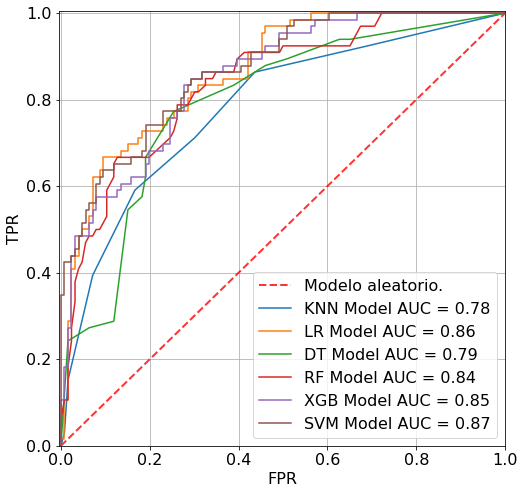

In [ ]:
plt.figure(figsize = (8,8))
plt.plot([0,1],[0,1],linestyle = '--', alpha = 0.8, lw = 2, label = 'Modelo aleatorio.', color = 'r')
k = 0
val_metrics = []
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  report = classification_report(y_test, y_pred, output_dict = True)
  y_pred_proba = model.predict_proba(X_test)[:,1]
  tpr, fpr, _ = roc_curve(y_test, y_pred_proba)
  auc = roc_auc_score(y_test, y_pred_proba)
  val_metrics.append(auc)
  val_metrics.append(report['accuracy'])
  val_metrics.append(report['1']['recall']) #Capacidad para detectar personas enfermas. Sensibilidad.
  val_metrics.append(report['0']['recall']) #Especificidad.
  val_metrics.append(report['1']['precision'])
  val_metrics.append(report['1']['f1-score']) #Balance entre sensibilidad y especificidad.
  plt.plot(tpr, fpr, label = colnames[k] + " Model AUC = {:.2f}".format(auc))
  k+=1

plt.grid();
plt.legend();
plt.xlim([-0.005,1]);
plt.ylim([0,1.005]);
plt.legend(loc = 'best');
plt.xlabel('FPR');
plt.ylabel('TPR');

In [ ]:
val_metrics = np.array(val_metrics)
#Convertir de vector a matriz.
val_metrics = val_metrics.reshape(len(models), 6)
print(val_metrics)

[[0.78192641 0.75       0.59090909 0.83333333 0.65       0.61904762]
 [0.86399711 0.80729167 0.66666667 0.88095238 0.74576271 0.704     ]
 [0.79304954 0.74479167 0.62121212 0.80952381 0.63076923 0.6259542 ]
 [0.83862434 0.77083333 0.66666667 0.82539683 0.66666667 0.66666667]
 [0.85185185 0.75520833 0.65151515 0.80952381 0.64179104 0.64661654]
 [0.86892737 0.79166667 0.65151515 0.86507937 0.71666667 0.68253968]]


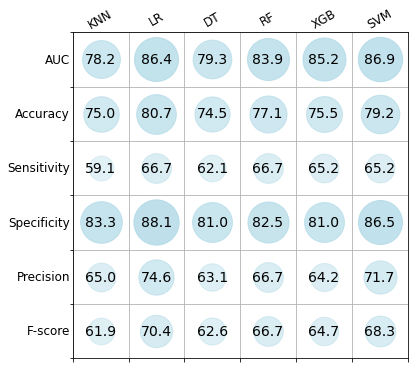

In [ ]:
rownames = ['AUC', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F-score']
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
plt.xlim([0, 120])
plt.ylim(0, 120)
plt.grid(True)
for i in range(6):
  plt.text(20*i+10, 125, colnames[i], fontsize = 12, ha = 'center', va = 'center', rotation = 30)
  plt.text(-1, 110-20*i, rownames[i], fontsize = 12, ha = 'right', va = 'center')

for i in range(6):
  for j in range(6):
    plt.text(20*i + 10, 110-20*j, '{:.1f}'.format(100*val_metrics[i][j]), fontsize = 14, ha = 'center', va = 'center')
    plt.scatter(20*i + 10, 110-20*j, c = 'lightblue', s = 3000*val_metrics[i][j]**3, alpha = val_metrics[i][j]**2)

ax.set_xticklabels([]);
ax.set_yticklabels([]);